In [2]:
import os

output_path = "./yolo_dataset"

os.makedirs(os.path.join(output_path, "images/train"), exist_ok=True)
os.makedirs(os.path.join(output_path, "images/val"), exist_ok=True)
os.makedirs(os.path.join(output_path, "labels/train"), exist_ok=True)
os.makedirs(os.path.join(output_path, "labels/val"), exist_ok=True)


In [3]:
import os
import shutil

train_path = "/kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/train"
val_path = "/kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/val"
check_path = "/kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check"
output_path = "./yolo_dataset"

categories = sorted(os.listdir(train_path))
class_mapping = {category: idx for idx, category in enumerate(categories)}

print(f"Found {len(categories)} categories: {categories}")
print("Class mapping:", class_mapping)

def process_directory(input_dir, output_subdir, class_mapping):
    for category in categories:
        category_path = os.path.join(input_dir, category)
        class_id = class_mapping[category]

        images = os.listdir(category_path)
        print(f"Processing category '{category}' with {len(images)} images in {output_subdir}.")

        for i, img_name in enumerate(images):
            img_path = os.path.join(category_path, img_name)

            img_dst = os.path.join(output_path, f"images/{output_subdir}", img_name)
            label_dst = os.path.join(output_path, f"labels/{output_subdir}", img_name.replace(".jpeg", ".txt"))

            os.makedirs(os.path.dirname(img_dst), exist_ok=True)
            os.makedirs(os.path.dirname(label_dst), exist_ok=True)

            shutil.copy(img_path, img_dst)

            with open(label_dst, 'w') as f:
                f.write(f"{class_id} 0.5 0.5 1.0 1.0\n")  

            if i % 10 == 0 or i == len(images) - 1:
                print(f"Processed {i + 1}/{len(images)} images in category '{category}' for {output_subdir}.")
process_directory(train_path, "train", class_mapping)
process_directory(val_path, "val", class_mapping)
process_directory(check_path, "check", class_mapping)

print("Data preparation complete. Files saved in:", output_path)

Found 9 categories: ['BABY_PRODUCTS', 'BEAUTY_HEALTH', 'CLOTHING_ACCESSORIES_JEWELLERY', 'ELECTRONICS', 'GROCERY', 'HOBBY_ARTS_STATIONERY', 'HOME_KITCHEN_TOOLS', 'PET_SUPPLIES', 'SPORTS_OUTDOOR']
Class mapping: {'BABY_PRODUCTS': 0, 'BEAUTY_HEALTH': 1, 'CLOTHING_ACCESSORIES_JEWELLERY': 2, 'ELECTRONICS': 3, 'GROCERY': 4, 'HOBBY_ARTS_STATIONERY': 5, 'HOME_KITCHEN_TOOLS': 6, 'PET_SUPPLIES': 7, 'SPORTS_OUTDOOR': 8}
Processing category 'BABY_PRODUCTS' with 1087 images in train.
Processed 1/1087 images in category 'BABY_PRODUCTS' for train.
Processed 11/1087 images in category 'BABY_PRODUCTS' for train.
Processed 21/1087 images in category 'BABY_PRODUCTS' for train.
Processed 31/1087 images in category 'BABY_PRODUCTS' for train.
Processed 41/1087 images in category 'BABY_PRODUCTS' for train.
Processed 51/1087 images in category 'BABY_PRODUCTS' for train.
Processed 61/1087 images in category 'BABY_PRODUCTS' for train.
Processed 71/1087 images in category 'BABY_PRODUCTS' for train.
Processed 81

In [4]:
yaml_content = """
train: /kaggle/working/yolo_dataset/images/train
val: /kaggle/working/yolo_dataset/images/val
nc: 9
names:
  0: "BABY_PRODUCTS"
  1: "BEAUTY_HEALTH"
  2: "CLOTHING_ACCESSORIES_JEWELLERY"
  3: "ELECTRONICS"
  4: "GROCERY"
  5: "HOBBY_ARTS_STATIONERY"
  6: "HOME_KITCHEN_TOOLS"
  7: "PET_SUPPLIES"
  8: "SPORTS_OUTDOOR"
"""

with open("/kaggle/working/yolo_dataset/dataset.yaml", "w") as file:
    file.write(yaml_content)

print("File dataset.yaml created successfully at /kaggle/working/yolo_dataset/dataset.yaml")

File dataset.yaml created successfully at /kaggle/working/yolo_dataset/dataset.yaml


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00a 0:00:01


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  

model.train(
    data='/kaggle/working/yolo_dataset/dataset.yaml',  
    epochs=50,                 
    imgsz=416,                 
    batch=16,                  
    device=0)

In [ ]:
from ultralytics import YOLO

model = YOLO(r"/kaggle/working/runs/detect/train/weights/best.pt")

model.train(
    data="/kaggle/working/yolo_dataset/dataset.yaml",
    epochs=20,
    patience=20,
    batch=8,
    imgsz=640,
    device=0,
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    hsv_h=0.015,
    hsv_s=0.5,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.8,
    mixup=0.0,
    val=True
)


In [6]:
from ultralytics import YOLO

model = YOLO(r"/kaggle/input/lastone/pytorch/default/1/best.pt")

model.train(
    data="/kaggle/working/yolo_dataset/dataset.yaml",
    epochs=50,
    patience=20,
    batch=8,
    imgsz=640,
    device=0,
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    hsv_h=0.015,
    hsv_s=0.5,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=0.8,
    mixup=0.0,
    val=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.122 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/lastone/pytorch/default/1/best.pt, data=/kaggle/working/yolo_dataset/dataset.yaml, epochs=50, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False,

100%|██████████| 755k/755k [00:00<00:00, 15.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 69.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 241.5±67.2 MB/s, size: 7.7 KB)


train: Scanning /kaggle/working/yolo_dataset/labels/train... 13992 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13992/13992 [00:11<00:00, 1182.08it/s]


train: New cache created: /kaggle/working/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 216.3±99.2 MB/s, size: 9.3 KB)


val: Scanning /kaggle/working/yolo_dataset/labels/val... 3632 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3632/3632 [00:03<00:00, 1111.31it/s]


val: New cache created: /kaggle/working/yolo_dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.16G     0.2236      1.071      1.047         19        640: 100%|██████████| 1749/1749 [03:22<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:24<00:00,  9.14it/s]

                   all       3632       3632      0.703       0.68      0.753      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       1.4G     0.1988      1.005     0.9949         21        640: 100%|██████████| 1749/1749 [03:13<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.76it/s]

                   all       3632       3632      0.703      0.706      0.771      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.4G     0.2329      1.081      1.017         26        640: 100%|██████████| 1749/1749 [03:11<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.79it/s]

                   all       3632       3632      0.627      0.661      0.697      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.4G     0.2621      1.166      1.038         19        640: 100%|██████████| 1749/1749 [03:10<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.83it/s]


                   all       3632       3632       0.58      0.641      0.656      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.4G     0.2643      1.165      1.041         21        640: 100%|██████████| 1749/1749 [03:11<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.76it/s]


                   all       3632       3632      0.643      0.642      0.691      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.4G     0.2572      1.155      1.033         19        640: 100%|██████████| 1749/1749 [03:10<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.83it/s]


                   all       3632       3632      0.644      0.676      0.708      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       1.4G     0.2474      1.149      1.025         25        640: 100%|██████████| 1749/1749 [03:10<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.02it/s]


                   all       3632       3632      0.654      0.629      0.698      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.4G     0.2427      1.135      1.023         12        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.77it/s]

                   all       3632       3632      0.612      0.612      0.664      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.4G     0.2447      1.133      1.025         17        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.83it/s]

                   all       3632       3632      0.613      0.674      0.709      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.4G     0.2377      1.128      1.021         27        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.91it/s]

                   all       3632       3632      0.647      0.678      0.718      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.4G     0.2368      1.125      1.022         22        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.90it/s]

                   all       3632       3632      0.645      0.683       0.73        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.4G     0.2295       1.11      1.015         22        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.04it/s]

                   all       3632       3632      0.679      0.673      0.741       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.4G      0.228      1.113      1.015         19        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.00it/s]


                   all       3632       3632      0.695      0.666      0.747      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.4G     0.2241      1.114      1.014         25        640: 100%|██████████| 1749/1749 [03:10<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.04it/s]

                   all       3632       3632        0.7      0.679      0.751       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.4G     0.2248      1.096      1.013         22        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.91it/s]

                   all       3632       3632       0.68       0.72      0.762       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.4G     0.2174      1.083       1.01         25        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.09it/s]

                   all       3632       3632      0.709      0.694      0.765      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.4G     0.2066      1.084          1         27        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.98it/s]

                   all       3632       3632      0.689      0.696      0.763      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.4G     0.2112      1.073      1.006         20        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.87it/s]

                   all       3632       3632      0.681      0.707      0.771      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.4G     0.2074      1.064     0.9992         15        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.07it/s]


                   all       3632       3632      0.743      0.688      0.784      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.4G     0.2029      1.054     0.9956         23        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.99it/s]

                   all       3632       3632      0.728      0.694      0.778      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.4G     0.2001      1.048      0.996         14        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.13it/s]


                   all       3632       3632      0.726       0.72      0.796      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       1.4G     0.1999      1.045     0.9957         18        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.97it/s]


                   all       3632       3632      0.737      0.712      0.788      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       1.4G     0.1956      1.033     0.9937         19        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.93it/s]

                   all       3632       3632      0.719       0.74      0.793      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.4G     0.1922      1.026     0.9918         17        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.86it/s]


                   all       3632       3632      0.731      0.731      0.801        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.4G     0.1917       1.02     0.9916         23        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.09it/s]

                   all       3632       3632       0.72      0.736      0.804      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.4G     0.1883      1.005     0.9873         18        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.99it/s]

                   all       3632       3632      0.769      0.698      0.795      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.4G     0.1863      1.015     0.9891         18        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.81it/s]

                   all       3632       3632      0.739      0.721      0.801      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       1.4G     0.1811      1.002     0.9831         21        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.97it/s]

                   all       3632       3632      0.756       0.73      0.812      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.4G     0.1773     0.9864     0.9834         22        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.03it/s]


                   all       3632       3632      0.737      0.743      0.809      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       1.4G     0.1778     0.9883     0.9833         17        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.01it/s]


                   all       3632       3632      0.774      0.745      0.822      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.4G     0.1751     0.9685     0.9806         22        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.89it/s]


                   all       3632       3632      0.774       0.75       0.83      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.4G     0.1708     0.9555     0.9752         17        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.06it/s]


                   all       3632       3632      0.757       0.75      0.826      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.4G     0.1646     0.9582     0.9711         27        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.98it/s]

                   all       3632       3632      0.783      0.745      0.827      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       1.4G     0.1687     0.9473     0.9778         17        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.06it/s]


                   all       3632       3632      0.764      0.747      0.824      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.4G     0.1641     0.9386     0.9755         19        640: 100%|██████████| 1749/1749 [03:09<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.95it/s]

                   all       3632       3632      0.776      0.755      0.831       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.4G     0.1626     0.9312     0.9745         23        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.06it/s]

                   all       3632       3632       0.78      0.753      0.836      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.4G     0.1593     0.9178     0.9715         15        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.95it/s]

                   all       3632       3632      0.813      0.727      0.835      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       1.4G     0.1593     0.9062     0.9718         22        640: 100%|██████████| 1749/1749 [03:08<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.11it/s]

                   all       3632       3632      0.807      0.745       0.84       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       1.4G     0.1534     0.9002     0.9665         15        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.04it/s]

                   all       3632       3632      0.814      0.758      0.845      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.4G     0.1493     0.8956      0.966         19        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.03it/s]


                   all       3632       3632      0.818      0.755      0.846      0.846
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.4G    0.03769     0.5904     0.9029          8        640: 100%|██████████| 1749/1749 [03:05<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.05it/s]

                   all       3632       3632      0.824      0.754      0.848      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       1.4G    0.03078     0.5527      0.903          8        640: 100%|██████████| 1749/1749 [03:06<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.86it/s]

                   all       3632       3632      0.821      0.758       0.85       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       1.4G    0.02854     0.5292     0.8983          8        640: 100%|██████████| 1749/1749 [03:05<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.12it/s]

                   all       3632       3632      0.806      0.764       0.85       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       1.4G    0.02645      0.512     0.9002          8        640: 100%|██████████| 1749/1749 [03:06<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00,  9.92it/s]

                   all       3632       3632      0.819      0.757      0.851      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.4G    0.02468     0.4782     0.8989          8        640: 100%|██████████| 1749/1749 [03:04<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.23it/s]

                   all       3632       3632       0.82      0.756      0.851      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       1.4G    0.02303     0.4792     0.9012          8        640: 100%|██████████| 1749/1749 [03:04<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:22<00:00, 10.07it/s]

                   all       3632       3632      0.785      0.791      0.849      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.4G    0.02171     0.4631     0.8982          8        640: 100%|██████████| 1749/1749 [03:05<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.84it/s]

                   all       3632       3632      0.784      0.792      0.852      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.4G    0.02037     0.4415     0.8987          8        640: 100%|██████████| 1749/1749 [03:07<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.71it/s]


                   all       3632       3632      0.787       0.79      0.852      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.4G        inf     0.4319     0.8976          8        640: 100%|██████████| 1749/1749 [03:05<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.82it/s]

                   all       3632       3632      0.782      0.796      0.852      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.4G    0.01925     0.4081     0.8972          8        640: 100%|██████████| 1749/1749 [03:06<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.87it/s]


                   all       3632       3632      0.789      0.787      0.852      0.852

50 epochs completed in 2.939 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.122 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 227/227 [00:23<00:00,  9.84it/s]


                   all       3632       3632      0.789      0.787      0.852      0.852
         BABY_PRODUCTS        282        282      0.895      0.826      0.917      0.917
         BEAUTY_HEALTH        312        312      0.765      0.734      0.801      0.801
CLOTHING_ACCESSORIES_JEWELLERY        278        278      0.866      0.917      0.945      0.945
           ELECTRONICS        351        351      0.811      0.822      0.889      0.889
               GROCERY       1033       1033       0.91        0.9      0.961      0.961
 HOBBY_ARTS_STATIONERY        283        283      0.694      0.721      0.784      0.784
    HOME_KITCHEN_TOOLS        445        445      0.625      0.676      0.744      0.743
          PET_SUPPLIES        327        327      0.793      0.784      0.853      0.853
        SPORTS_OUTDOOR        321        321      0.737      0.704      0.775      0.774
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to run

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d4d9a0ee380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check/PET_SUPPLIES/18078_PET_SU_check.jpeg: 640x640 1 PET_SUPPLIES, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
tensor([7.], device='cuda:0') tensor([0.9132], device='cuda:0')


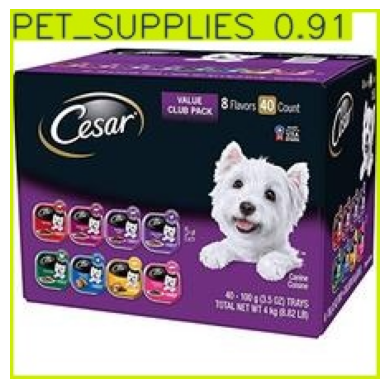

In [21]:
from ultralytics import YOLO
from PIL import Image

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

results = model("/kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check/PET_SUPPLIES/18078_PET_SU_check.jpeg", show=True)

for result in results:
    print(result.boxes.cls, result.boxes.conf)
from matplotlib import pyplot as plt

result = results[0]
result.save(filename="output.jpg")  

img = Image.open("output.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check/SPORTS_OUTDOOR/18127_SPORTS_check.jpeg: 640x640 1 SPORTS_OUTDOOR, 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
tensor([8.], device='cuda:0') tensor([0.9966], device='cuda:0')


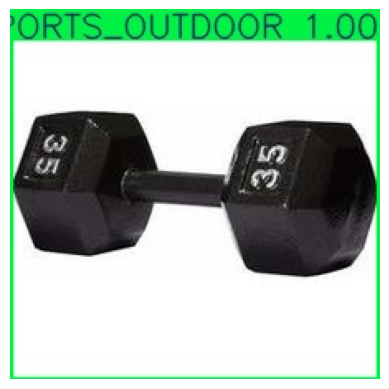

In [25]:
from ultralytics import YOLO
from PIL import Image

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

results = model("/kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check/SPORTS_OUTDOOR/18127_SPORTS_check.jpeg", show=True)

for result in results:
    print(result.boxes.cls, result.boxes.conf)
from matplotlib import pyplot as plt

result = results[0]
result.save(filename="output.jpg")  

img = Image.open("output.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

def predict_category(image_path):
    results = model(image_path)
    result = results[0]

    if result.boxes.cls.numel() == 0:
        return "No object detected"

    cls_id = int(result.boxes.cls[0])
    class_name = model.names[cls_id]
    return class_name

In [24]:
image_path = "/kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check/SPORTS_OUTDOOR/18127_SPORTS_check.jpeg"
category = predict_category(image_path)
print("Predicted Category:", category)


image 1/1 /kaggle/input/ecommerce-product-images-18k/ECOMMERCE_PRODUCT_IMAGES/check/SPORTS_OUTDOOR/18127_SPORTS_check.jpeg: 640x640 1 SPORTS_OUTDOOR, 12.5ms
Speed: 3.2ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Predicted Category: SPORTS_OUTDOOR


In [27]:
from ultralytics import YOLO
from PIL import Image
import requests
from io import BytesIO

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

def predict_category(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content)).convert("RGB")

    results = model(image)
    result = results[0]

    if result.boxes.cls.numel() == 0:
        return "No object detected"

    cls_id = int(result.boxes.cls[0])
    class_name = model.names[cls_id]
    return class_name

In [30]:
url = "https://m.media-amazon.com/images/I/71fTE1ORVxS.__AC_SY300_SX300_QL70_ML2_.jpg"
category = predict_category(url)
print("Predicted Category:", category)


0: 512x640 1 SPORTS_OUTDOOR, 49.3ms
Speed: 2.3ms preprocess, 49.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)
Predicted Category: SPORTS_OUTDOOR
